**Real World Smartphone's Price Prediction Project**

**About Dataset**


The data was gathered using web scraping from reputable online sources, ensuring accuracy and relevance. Each entry includes essential attributes such as smartphone model, brand, operating system, release date, display size, processor, RAM, internal storage, camera details, battery capacity, connectivity options, additional features, and market price.


In [3]:
#importing of main libriries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

In [4]:
pd.set_option("display.max_columns",None)
df= pd.read_csv('smartphones.csv')

In [5]:
#data view
df

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.20,5000.0,1,100.0,12.0,256.0,6.70,120,3,1.0,android,50.0,16.0,0,NaN,1440,3216
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.20,5000.0,1,33.0,6.0,128.0,6.59,120,3,1.0,android,64.0,16.0,1,1024.0,1080,2412
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.40,5000.0,1,15.0,4.0,64.0,6.60,90,3,1.0,android,50.0,13.0,1,1024.0,1080,2408
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.20,5000.0,1,NaN,6.0,128.0,6.55,120,3,1.0,android,50.0,16.0,1,1024.0,1080,2400
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.60,5000.0,1,67.0,6.0,128.0,6.70,120,3,1.0,android,108.0,16.0,0,NaN,1080,2412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,motorola,Motorola Moto Edge S30 Pro,34990,83.0,True,False,False,snapdragon,8.0,3.00,5000.0,1,68.0,8.0,128.0,6.67,120,3,1.0,android,64.0,16.0,0,NaN,1080,2460
976,honor,Honor X8 5G,14990,75.0,True,False,False,snapdragon,8.0,2.20,5000.0,1,22.0,6.0,128.0,6.50,60,3,1.0,android,48.0,8.0,1,1024.0,720,1600
977,poco,POCO X4 GT 5G (8GB RAM + 256GB),28990,85.0,True,True,True,dimensity,8.0,2.85,5080.0,1,67.0,8.0,256.0,6.60,144,3,1.0,android,64.0,16.0,0,NaN,1080,2460
978,motorola,Motorola Moto G91 5G,19990,80.0,True,True,False,snapdragon,8.0,2.20,5000.0,1,NaN,6.0,128.0,6.80,60,3,1.0,android,108.0,32.0,1,1024.0,1080,2400


In [6]:
# Shape of Data
df.shape

(980, 26)

In [7]:
# top 5 rows of data
df.head()


,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.2,5000.0,1,100.0,12.0,256.0,6.70,120,3,1.0,android,50.0,16.0,0,NaN,1440,3216
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.2,5000.0,1,33.0,6.0,128.0,6.59,120,3,1.0,android,64.0,16.0,1,1024.0,1080,2412
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.4,5000.0,1,15.0,4.0,64.0,6.60,90,3,1.0,android,50.0,13.0,1,1024.0,1080,2408
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.2,5000.0,1,NaN,6.0,128.0,6.55,120,3,1.0,android,50.0,16.0,1,1024.0,1080,2400
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.6,5000.0,1,67.0,6.0,128.0,6.70,120,3,1.0,android,108.0,16.0,0,NaN,1080,2412


In [8]:
# Ending 5 rows of data
df.tail()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
975,motorola,Motorola Moto Edge S30 Pro,34990,83.0,True,False,False,snapdragon,8.0,3.00,5000.0,1,68.0,8.0,128.0,6.67,120,3,1.0,android,64.0,16.0,0,NaN,1080,2460
976,honor,Honor X8 5G,14990,75.0,True,False,False,snapdragon,8.0,2.20,5000.0,1,22.0,6.0,128.0,6.50,60,3,1.0,android,48.0,8.0,1,1024.0,720,1600
977,poco,POCO X4 GT 5G (8GB RAM + 256GB),28990,85.0,True,True,True,dimensity,8.0,2.85,5080.0,1,67.0,8.0,256.0,6.60,144,3,1.0,android,64.0,16.0,0,NaN,1080,2460
978,motorola,Motorola Moto G91 5G,19990,80.0,True,True,False,snapdragon,8.0,2.20,5000.0,1,NaN,6.0,128.0,6.80,60,3,1.0,android,108.0,32.0,1,1024.0,1080,2400
979,samsung,Samsung Galaxy M52s 5G,24990,74.0,True,False,False,NaN,8.0,NaN,5000.0,1,NaN,8.0,128.0,6.50,60,3,1.0,android,64.0,32.0,1,1024.0,1080,2400


In [9]:
#information of Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    int64  
 3   rating                     879 non-null    float64
 4   has_5g                     980 non-null    bool   
 5   has_nfc                    980 non-null    bool   
 6   has_ir_blaster             980 non-null    bool   
 7   processor_brand            960 non-null    object 
 8   num_cores                  974 non-null    float64
 9   processor_speed            938 non-null    float64
 10  battery_capacity           969 non-null    float64
 11  fast_charging_available    980 non-null    int64  
 12  fast_charging              769 non-null    float64
 13  ram_capacity               980 non-null    float64

In [10]:
# calucate the null values
df.isnull().sum()

brand_name                     0
model                          0
price                          0
rating                       101
has_5g                         0
has_nfc                        0
has_ir_blaster                 0
processor_brand               20
num_cores                      6
processor_speed               42
battery_capacity              11
fast_charging_available        0
fast_charging                211
ram_capacity                   0
internal_memory                0
screen_size                    0
refresh_rate                   0
num_rear_cameras               0
num_front_cameras              4
os                            14
primary_camera_rear            0
primary_camera_front           5
extended_memory_available      0
extended_upto                480
resolution_width               0
resolution_height              0
dtype: int64

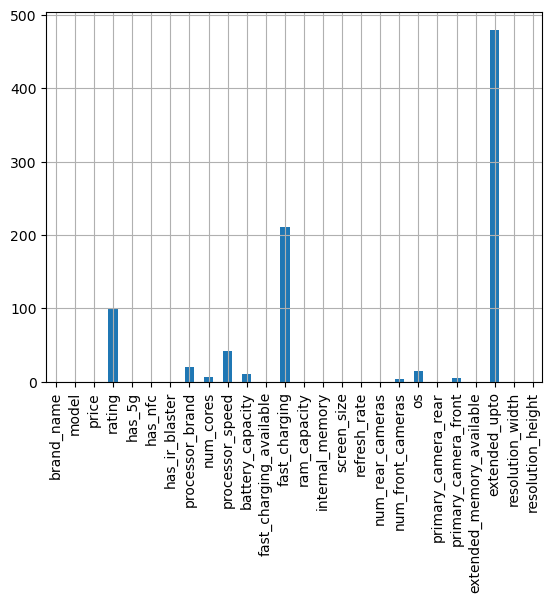

In [11]:
# calucate the null values  are seeing inthe plot diagram
df.isna().sum().plot(kind='bar')
plt.grid(True)

In [12]:
# fill null values using with Mask 
mask1= df['fast_charging_available']==0

df.loc[mask1, 'fast_charging'] = df.loc[mask1, 'fast_charging'].fillna(10)

df[mask1]['fast_charging'].isnull().sum()

0

In [13]:
# fill null values using with Mask 
mask2= df['fast_charging_available']==1

df.loc[mask2, 'fast_charging'] = df.loc[mask2, 'fast_charging'].fillna(33)

df[mask2]['fast_charging'].isnull().sum()

0

In [14]:
# fill null values using with Mask 
mask3 = df['extended_memory_available']==0

df.loc[mask3,'extended_upto'] = df.loc[mask3,'extended_upto'].fillna(0)

df[mask3]['extended_upto'].isnull().sum() 

0

In [15]:
# fill null values using with Mask 
mask4 = df['extended_memory_available']==1

df.loc[mask4,'extended_upto'] = df.loc[mask4,'extended_upto'].fillna(128.0)

df[mask4]['extended_upto'].isnull().sum() 

0

In [16]:
# Fill null values in data 


#df['fast_charging'].fillna(66.0,inplace=True)
#df['rating'] = df.groupby('brand_name')['rating'].transform(lambda x: x.fillna(x.mean()))
#missing_values_rating = df[df['rating'].isnull()].groupby('brand_name').agg({'brand_name':'count'}).rename(columns ={'brand_name': 'missing_rating_values'})

df['rating'].fillna(78,inplace=True)
df['processor_brand'].fillna('snapdragon',inplace=True)
df['os'].fillna('android',inplace=True)
df["processor_speed"].fillna(2.40,inplace=True)
df['num_cores'].fillna(8.0,inplace=True)
df['battery_capacity'].fillna(4500.0,inplace=True)
df['num_front_cameras'].fillna(1.0,inplace=True)
df['primary_camera_front'].fillna(12.0,inplace=True)
#df['extended_upto'].fillna(0,inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    int64  
 3   rating                     980 non-null    float64
 4   has_5g                     980 non-null    bool   
 5   has_nfc                    980 non-null    bool   
 6   has_ir_blaster             980 non-null    bool   
 7   processor_brand            980 non-null    object 
 8   num_cores                  980 non-null    float64
 9   processor_speed            980 non-null    float64
 10  battery_capacity           980 non-null    float64
 11  fast_charging_available    980 non-null    int64  
 12  fast_charging              980 non-null    float64
 13  ram_capacity               980 non-null    float64

In [18]:
#After filling null values see the data  
df.isnull().sum()

brand_name                   0
model                        0
price                        0
rating                       0
has_5g                       0
has_nfc                      0
has_ir_blaster               0
processor_brand              0
num_cores                    0
processor_speed              0
battery_capacity             0
fast_charging_available      0
fast_charging                0
ram_capacity                 0
internal_memory              0
screen_size                  0
refresh_rate                 0
num_rear_cameras             0
num_front_cameras            0
os                           0
primary_camera_rear          0
primary_camera_front         0
extended_memory_available    0
extended_upto                0
resolution_width             0
resolution_height            0
dtype: int64

In [19]:
# Replace the values into ones and zeros
df["has_5g"] =df['has_5g'].replace({True: 1, False: 0})
df["has_nfc"] =df['has_nfc'].replace({True: 1, False: 0})
df["has_ir_blaster"] =df['has_ir_blaster'].replace({True: 1, False: 0})

In [20]:
df.columns

Index(['brand_name', 'model', 'price', 'rating', 'has_5g', 'has_nfc',
       'has_ir_blaster', 'processor_brand', 'num_cores', 'processor_speed',
       'battery_capacity', 'fast_charging_available', 'fast_charging',
       'ram_capacity', 'internal_memory', 'screen_size', 'refresh_rate',
       'num_rear_cameras', 'num_front_cameras', 'os', 'primary_camera_rear',
       'primary_camera_front', 'extended_memory_available', 'extended_upto',
       'resolution_width', 'resolution_height'],
      dtype='object')

**Deleted some useless columns**

In [22]:
del df['extended_memory_available']

In [23]:
del df['fast_charging_available']

In [24]:
df

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_upto,resolution_width,resolution_height
0,oneplus,OnePlus 11 5G,54999,89.0,1,1,0,snapdragon,8.0,3.20,5000.0,100.0,12.0,256.0,6.70,120,3,1.0,android,50.0,16.0,0.0,1440,3216
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,1,0,0,snapdragon,8.0,2.20,5000.0,33.0,6.0,128.0,6.59,120,3,1.0,android,64.0,16.0,1024.0,1080,2412
2,samsung,Samsung Galaxy A14 5G,16499,75.0,1,0,0,exynos,8.0,2.40,5000.0,15.0,4.0,64.0,6.60,90,3,1.0,android,50.0,13.0,1024.0,1080,2408
3,motorola,Motorola Moto G62 5G,14999,81.0,1,0,0,snapdragon,8.0,2.20,5000.0,33.0,6.0,128.0,6.55,120,3,1.0,android,50.0,16.0,1024.0,1080,2400
4,realme,Realme 10 Pro Plus,24999,82.0,1,0,0,dimensity,8.0,2.60,5000.0,67.0,6.0,128.0,6.70,120,3,1.0,android,108.0,16.0,0.0,1080,2412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,motorola,Motorola Moto Edge S30 Pro,34990,83.0,1,0,0,snapdragon,8.0,3.00,5000.0,68.0,8.0,128.0,6.67,120,3,1.0,android,64.0,16.0,0.0,1080,2460
976,honor,Honor X8 5G,14990,75.0,1,0,0,snapdragon,8.0,2.20,5000.0,22.0,6.0,128.0,6.50,60,3,1.0,android,48.0,8.0,1024.0,720,1600
977,poco,POCO X4 GT 5G (8GB RAM + 256GB),28990,85.0,1,1,1,dimensity,8.0,2.85,5080.0,67.0,8.0,256.0,6.60,144,3,1.0,android,64.0,16.0,0.0,1080,2460
978,motorola,Motorola Moto G91 5G,19990,80.0,1,1,0,snapdragon,8.0,2.20,5000.0,33.0,6.0,128.0,6.80,60,3,1.0,android,108.0,32.0,1024.0,1080,2400


In [25]:
df.describe(include = 'object')

,brand_name,model,processor_brand,os
count,980,980,980,980
unique,46,980,13,3
top,xiaomi,OnePlus 11 5G,snapdragon,android
freq,134,1,433,923


In [26]:
for col in df.describe(include = 'object').columns:
    print('Column Nmae: ', col)
    print(df[col].unique())
    print('-------'*10)

Column Nmae:  brand_name
['oneplus' 'samsung' 'motorola' 'realme' 'apple' 'xiaomi' 'nothing' 'oppo'
 'vivo' 'poco' 'iqoo' 'jio' 'gionee' 'tecno' 'tesla' 'google' 'infinix'
 'cola' 'letv' 'ikall' 'leeco' 'duoqin' 'nokia' 'lava' 'honor' 'nubia'
 'redmi' 'asus' 'itel' 'royole' 'sony' 'oukitel' 'vertu' 'blu' 'lyf'
 'huawei' 'zte' 'lenovo' 'lg' 'micromax' 'leitz' 'cat' 'doogee' 'tcl'
 'sharp' 'blackview']
----------------------------------------------------------------------
Column Nmae:  model
['OnePlus 11 5G' 'OnePlus Nord CE 2 Lite 5G' 'Samsung Galaxy A14 5G'
 'Motorola Moto G62 5G' 'Realme 10 Pro Plus'
 'Samsung Galaxy F23 5G (6GB RAM + 128GB)' 'Apple iPhone 14'
 'Xiaomi Redmi Note 12 Pro Plus' 'Nothing Phone 1' 'OnePlus Nord 2T 5G'
 'Realme 10 Pro' 'Oppo A78' 'Xiaomi Redmi Note 12 Pro 5G'
 'Vivo T1 5G (6GB RAM + 128GB)' 'Samsung Galaxy S23 Ultra 5G'
 'Apple iPhone 13' 'Vivo Y16' 'OPPO Reno 9 Pro Plus' 'OnePlus 10R 5G'
 'Vivo Y22' 'OnePlus 11R' 'Vivo V25 Pro 5G' 'Poco X4 Pro 5G'
 'Xiaom

In [27]:
df.columns

Index(['brand_name', 'model', 'price', 'rating', 'has_5g', 'has_nfc',
       'has_ir_blaster', 'processor_brand', 'num_cores', 'processor_speed',
       'battery_capacity', 'fast_charging', 'ram_capacity', 'internal_memory',
       'screen_size', 'refresh_rate', 'num_rear_cameras', 'num_front_cameras',
       'os', 'primary_camera_rear', 'primary_camera_front', 'extended_upto',
       'resolution_width', 'resolution_height'],
      dtype='object')

In [28]:
for i in df.columns:
    
    print(df[i].value_counts())
    print("-----"*20)

xiaomi       134
samsung      132
vivo         111
realme        97
oppo          88
motorola      52
apple         46
oneplus       42
poco          41
tecno         33
iqoo          32
infinix       29
huawei        16
google        14
nokia         13
honor         13
itel          10
sony           9
asus           7
nubia          6
nothing        5
lava           4
jio            4
gionee         3
micromax       3
oukitel        3
lg             3
redmi          3
letv           3
ikall          3
royole         2
doogee         2
zte            2
lenovo         2
lyf            2
sharp          1
tcl            1
cat            1
leitz          1
duoqin         1
leeco          1
blu            1
vertu          1
tesla          1
cola           1
blackview      1
Name: brand_name, dtype: int64
----------------------------------------------------------------------------------------------------
OnePlus 11 5G                              1
Infinix Hot 12 Pro                       

In [29]:
df.describe()

,price,rating,has_5g,has_nfc,has_ir_blaster,num_cores,processor_speed,battery_capacity,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,extended_upto,resolution_width,resolution_height
count,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000
mean,32520.504082,78.231633,0.560204,0.401020,0.162245,7.773469,2.426051,4814.181633,39.943878,6.560204,141.036735,6.536765,92.256122,2.814286,1.029592,50.319286,16.565714,390.955102,1075.852041,2214.663265
std,39531.812669,7.011039,0.496616,0.490355,0.368864,0.834466,0.454059,1004.410998,32.955660,2.744378,107.134516,0.349162,28.988052,0.776441,0.169545,33.000968,10.853922,440.784390,290.164931,516.484254
min,3499.000000,60.000000,0.000000,0.000000,0.000000,4.000000,1.200000,1821.000000,10.000000,1.000000,8.000000,3.540000,60.000000,1.000000,1.000000,2.000000,0.300000,0.000000,480.000000,480.000000
25%,12999.000000,75.000000,0.000000,0.000000,0.000000,8.000000,2.050000,4500.000000,18.000000,4.000000,64.000000,6.500000,60.000000,2.000000,1.000000,24.000000,8.000000,0.000000,1080.000000,1612.000000
50%,19994.500000,79.000000,1.000000,0.000000,0.000000,8.000000,2.400000,5000.000000,33.000000,6.000000,128.000000,6.580000,90.000000,3.000000,1.000000,50.000000,16.000000,128.000000,1080.000000,2400.000000
75%,35491.500000,84.000000,1.000000,1.000000,0.000000,8.000000,2.840000,5000.000000,65.000000,8.000000,128.000000,6.670000,120.000000,3.000000,1.000000,64.000000,16.000000,1024.000000,1080.000000,2408.000000
max,650000.000000,89.000000,1.000000,1.000000,1.000000,8.000000,3.220000,22000.000000,240.000000,18.000000,1024.000000,8.030000,240.000000,4.000000,2.000000,200.000000,60.000000,2048.000000,2460.000000,3840.000000


In [30]:
num_col=df.select_dtypes(include='number').columns
num_col1= df[['price', 'rating', 'has_5g', 'has_nfc', 'has_ir_blaster', 'num_cores',
       'processor_speed', 'battery_capacity', 'fast_charging', 'ram_capacity',
       'internal_memory', 'screen_size', 'refresh_rate', 'num_rear_cameras',
       'num_front_cameras', 'primary_camera_rear', 'primary_camera_front',
       'extended_upto', 'resolution_width', 'resolution_height']]

In [31]:
# create the dictionaries for statistics
mean = {}
max ={}
min = {}
median = {}
var = {}
mode = {}

# calculate the statistics for each column
for i in df[num_col]:
    mean[i]= df[i].mean()
    max[i] = df[i].max()
    min[i] = df[i].min()
    median[i]= df[i].median()
    var[i] = df[i].var()
    mode[i] = df[i].mode()


# printing statistis for each column using with For loop  
    print(f'column: {i}')
    print("___________________________")
    print(f'Mean:  {mean[i]}')
    print(f'Max:   {max[i]}')
    print(f'MIn:   {min[i]}')
    print(f'Median:   {median[i]}')
    print(f'Var:   {var[i]}')
    print(f'Mode:  {mode[i]}')
    print("--------"*10)

column: price
___________________________
Mean:  32520.504081632655
Max:   650000
MIn:   3499
Median:   19994.5
Var:   1562764212.88558
Mode:  0    14999
Name: price, dtype: int64
--------------------------------------------------------------------------------
column: rating
___________________________
Mean:  78.23163265306123
Max:   89.0
MIn:   60.0
Median:   79.0
Var:   49.154667403222824
Mode:  0    78.0
Name: rating, dtype: float64
--------------------------------------------------------------------------------
column: has_5g
___________________________
Mean:  0.560204081632653
Max:   1
MIn:   0
Median:   1.0
Var:   0.24662712889036903
Mode:  0    1
Name: has_5g, dtype: int64
--------------------------------------------------------------------------------
column: has_nfc
___________________________
Mean:  0.4010204081632653
Max:   1
MIn:   0
Median:   0.0
Var:   0.24044839590585879
Mode:  0    0
Name: has_nfc, dtype: int64
-----------------------------------------------------------

In [32]:
df_cor = df[num_col].corr()
df_cor


,price,rating,has_5g,has_nfc,has_ir_blaster,num_cores,processor_speed,battery_capacity,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,extended_upto,resolution_width,resolution_height
price,1.000000,0.251212,0.305066,0.470951,-0.015807,-0.045720,0.446164,-0.161090,0.200229,0.386002,0.557168,0.113253,0.244115,0.125330,0.111685,0.092095,0.156467,-0.290601,0.340592,0.353578
rating,0.251212,1.000000,0.564687,0.444177,0.149368,0.133986,0.533251,-0.011172,0.522538,0.644949,0.403640,0.193995,0.570683,0.455245,0.111094,0.469977,0.514543,-0.145743,0.374518,0.577638
has_5g,0.305066,0.564687,1.000000,0.481702,0.105542,0.138931,0.596483,-0.016318,0.481745,0.533957,0.403837,0.230598,0.611794,0.206512,0.057674,0.347918,0.357535,-0.215518,0.301828,0.504365
has_nfc,0.470951,0.444177,0.481702,1.000000,-0.032541,0.027526,0.591913,-0.109484,0.388610,0.458336,0.413071,0.103099,0.410777,0.166299,0.065983,0.131004,0.284574,-0.372233,0.342789,0.430081
has_ir_blaster,-0.015807,0.149368,0.105542,-0.032541,1.000000,0.119527,0.103422,0.061316,0.244346,0.059460,0.030789,0.140809,0.178378,0.198043,-0.011516,0.243608,0.010142,-0.017401,0.155688,0.202746
num_cores,-0.045720,0.133986,0.138931,0.027526,0.119527,1.000000,0.189474,0.240153,0.203007,0.303464,0.043670,0.380662,0.231440,0.341745,0.047430,0.311236,0.219779,0.145406,0.137969,0.266635
processor_speed,0.446164,0.533251,0.596483,0.591913,0.103422,0.189474,1.000000,-0.045507,0.578059,0.614774,0.475271,0.286561,0.540666,0.250680,0.123589,0.275336,0.384497,-0.381795,0.358233,0.543664
battery_capacity,-0.161090,-0.011172,-0.016318,-0.109484,0.061316,0.240153,-0.045507,1.000000,0.004858,0.087693,-0.002542,0.343397,0.091264,0.157217,-0.071056,0.173928,-0.004337,0.227433,-0.024471,0.035876
fast_charging,0.200229,0.522538,0.481745,0.388610,0.244346,0.203007,0.578059,0.004858,1.000000,0.590499,0.343686,0.287873,0.589997,0.274993,0.039053,0.486634,0.457096,-0.315934,0.292314,0.421900
ram_capacity,0.386002,0.644949,0.533957,0.458336,0.059460,0.303464,0.614774,0.087693,0.590499,1.000000,0.592332,0.396613,0.573977,0.384908,0.166301,0.431377,0.515231,-0.245708,0.380274,0.578105


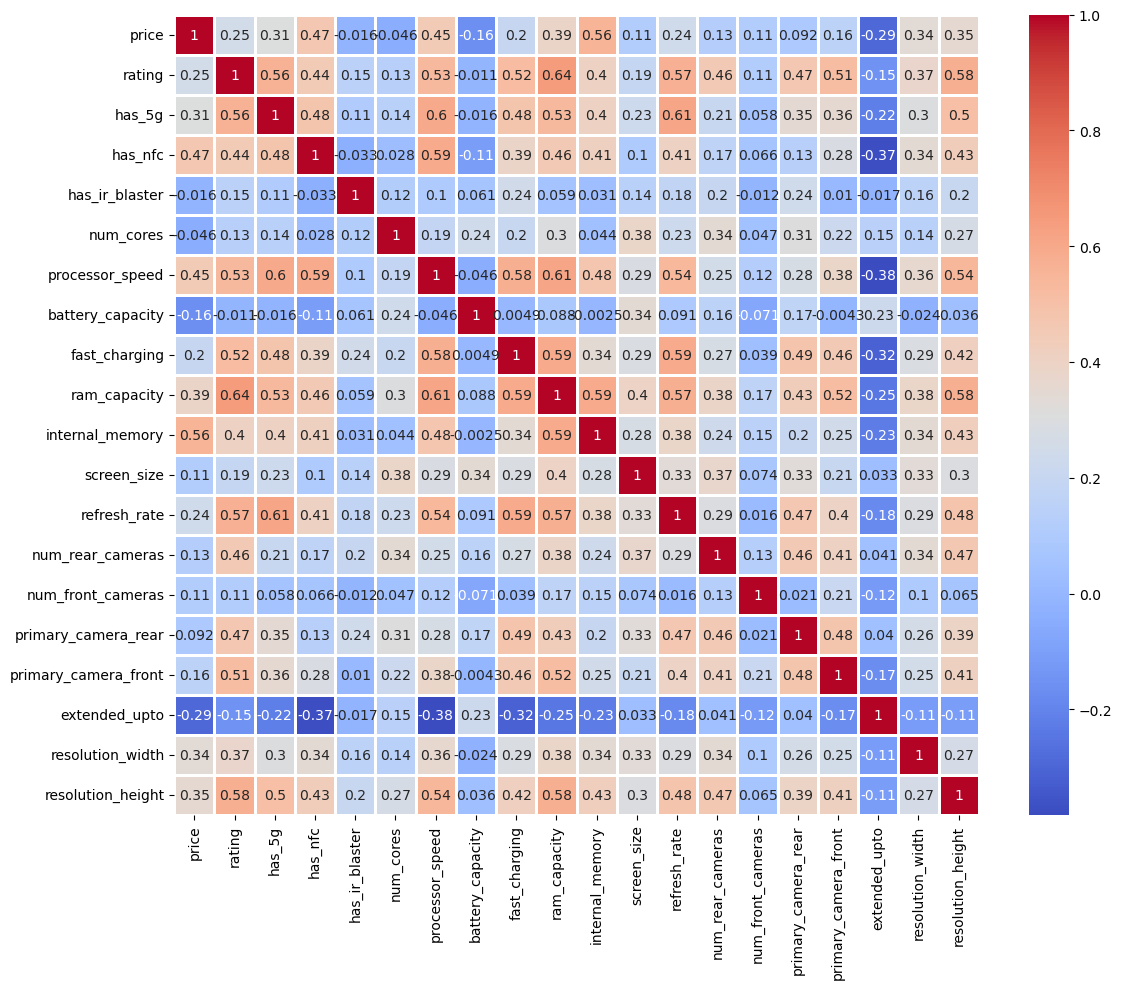

In [33]:
plt.figure(figsize=(12,10))
sns.heatmap(data=df_cor,annot=True,fmt= '0.2g',linewidths=1,cmap='coolwarm')
plt.tight_layout()
plt.show()

In [34]:
pd.crosstab(df.brand_name,df.processor_brand)

processor_brand,bionic,dimensity,exynos,fusion,google,helio,kirin,mediatek,sc9863a,snapdragon,spreadtrum,tiger,unisoc
brand_name,,,,,,,,,,,,,
apple,45,0,0,1,0,0,0,0,0,0,0,0,0
asus,0,2,0,0,0,0,0,0,0,5,0,0,0
blackview,0,0,0,0,0,1,0,0,0,0,0,0,0
blu,0,1,0,0,0,0,0,0,0,0,0,0,0
cat,0,0,0,0,0,0,0,0,0,1,0,0,0
cola,0,0,0,0,0,1,0,0,0,0,0,0,0
doogee,0,1,0,0,0,1,0,0,0,0,0,0,0
duoqin,0,0,0,0,0,1,0,0,0,0,0,0,0
gionee,0,0,0,0,0,1,0,0,0,0,0,2,0


In [35]:
pd.crosstab(df.brand_name,df.num_cores)

num_cores,4.0,6.0,8.0
brand_name,,,
apple,1,39,6
asus,0,0,7
blackview,0,0,1
blu,0,0,1
cat,1,0,0
cola,0,0,1
doogee,0,0,2
duoqin,0,0,1
gionee,2,0,1


In [36]:
pd.crosstab(df.brand_name,df.has_5g)

has_5g,0,1
brand_name,,
apple,9,37
asus,0,7
blackview,0,1
blu,0,1
cat,1,0
cola,1,0
doogee,1,1
duoqin,1,0
gionee,3,0


In [37]:
pd.crosstab(df.brand_name,df.has_nfc)

has_nfc,0,1
brand_name,,
apple,1,45
asus,0,7
blackview,0,1
blu,0,1
cat,1,0
cola,1,0
doogee,1,1
duoqin,1,0
gionee,3,0


In [38]:
pd.crosstab(df.brand_name,df.has_ir_blaster)

has_ir_blaster,0,1
brand_name,,
apple,46,0
asus,7,0
blackview,1,0
blu,1,0
cat,1,0
cola,1,0
doogee,2,0
duoqin,1,0
gionee,3,0


In [39]:
pd.crosstab(df.brand_name,df.ram_capacity)

ram_capacity,1.0,2.0,3.0,4.0,6.0,8.0,12.0,16.0,18.0
brand_name,,,,,,,,,
apple,0,0,3,16,23,4,0,0,0
asus,0,0,0,0,0,2,1,2,2
blackview,0,0,0,1,0,0,0,0,0
blu,0,0,0,0,0,1,0,0,0
cat,0,1,0,0,0,0,0,0,0
cola,0,0,0,1,0,0,0,0,0
doogee,0,0,0,0,0,1,1,0,0
duoqin,0,0,0,1,0,0,0,0,0
gionee,0,0,1,1,1,0,0,0,0


In [40]:
pd.crosstab(df.brand_name,df.internal_memory)

internal_memory,8.0,16.0,32.0,64.0,128.0,256.0,512.0,1024.0
brand_name,,,,,,,,
apple,0,0,1,9,16,11,5,4
asus,0,0,0,0,2,3,2,0
blackview,0,0,0,1,0,0,0,0
blu,0,0,0,0,1,0,0,0
cat,0,1,0,0,0,0,0,0
cola,0,0,0,1,0,0,0,0
doogee,0,0,0,0,1,1,0,0
duoqin,0,0,0,1,0,0,0,0
gionee,0,0,2,0,1,0,0,0


In [41]:
pd.crosstab(df.brand_name,df.num_rear_cameras)

num_rear_cameras,1,2,3,4
brand_name,,,,
apple,5,22,19,0
asus,0,1,6,0
blackview,0,1,0,0
blu,0,0,0,1
cat,1,0,0,0
cola,0,1,0,0
doogee,0,0,2,0
duoqin,1,0,0,0
gionee,2,1,0,0


In [42]:
pd.crosstab(df.brand_name,df.num_front_cameras)

num_front_cameras,1.0,2.0
brand_name,,
apple,46,0
asus,7,0
blackview,1,0
blu,1,0
cat,1,0
cola,1,0
doogee,2,0
duoqin,1,0
gionee,3,0


In [43]:
pd.crosstab(df.brand_name,df.extended_upto)

extended_upto,0.0,32.0,64.0,128.0,256.0,512.0,1024.0,2048.0
brand_name,,,,,,,,
apple,46,0,0,0,0,0,0,0
asus,7,0,0,0,0,0,0,0
blackview,0,0,0,1,0,0,0,0
blu,0,0,0,1,0,0,0,0
cat,1,0,0,0,0,0,0,0
cola,0,0,0,0,0,0,1,0
doogee,0,0,0,0,0,0,1,1
duoqin,0,0,0,1,0,0,0,0
gionee,0,0,0,2,1,0,0,0


In [44]:
pd.crosstab(df.processor_brand,df.os)

os,android,ios,other
processor_brand,,,
bionic,0,45,0
dimensity,177,0,0
exynos,50,0,0
fusion,0,1,0
google,9,0,0
helio,201,0,0
kirin,5,0,2
mediatek,1,0,0
sc9863a,2,0,0


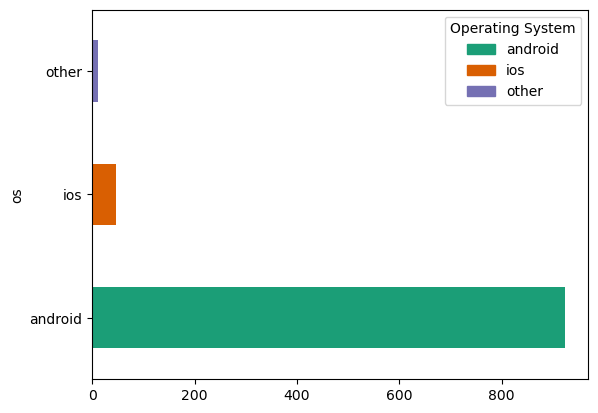

In [45]:
df_group= df.groupby('os').size()
df_group.plot(kind='barh',color= sns.palettes.mpl_palette('Dark2'))

# Create custom legend labels
handles = [plt.Rectangle((0, 0), 1, 1, color=c) for c in sns.color_palette('Dark2')]
labels = df_group.index.tolist()

# Add the legend
plt.legend(handles, labels, title='Operating System')
plt.show()



The code creates a horizontal bar chart by grouping data by the 'os' column and plotting the counts of each group. The chart is colored using Seaborn's 'Dark2' color palette. A custom legend is created by manually defining handles and labels for each group. The code is broken down into 6 steps: grouping data, plotting the data, creating handles for the legend, converting the index to a list, adding the legend, and displaying the plot. However, the code may throw an error if Seaborn is not imported, which can be fixed by adding 'import seaborn as sns' at the beginning of the code.

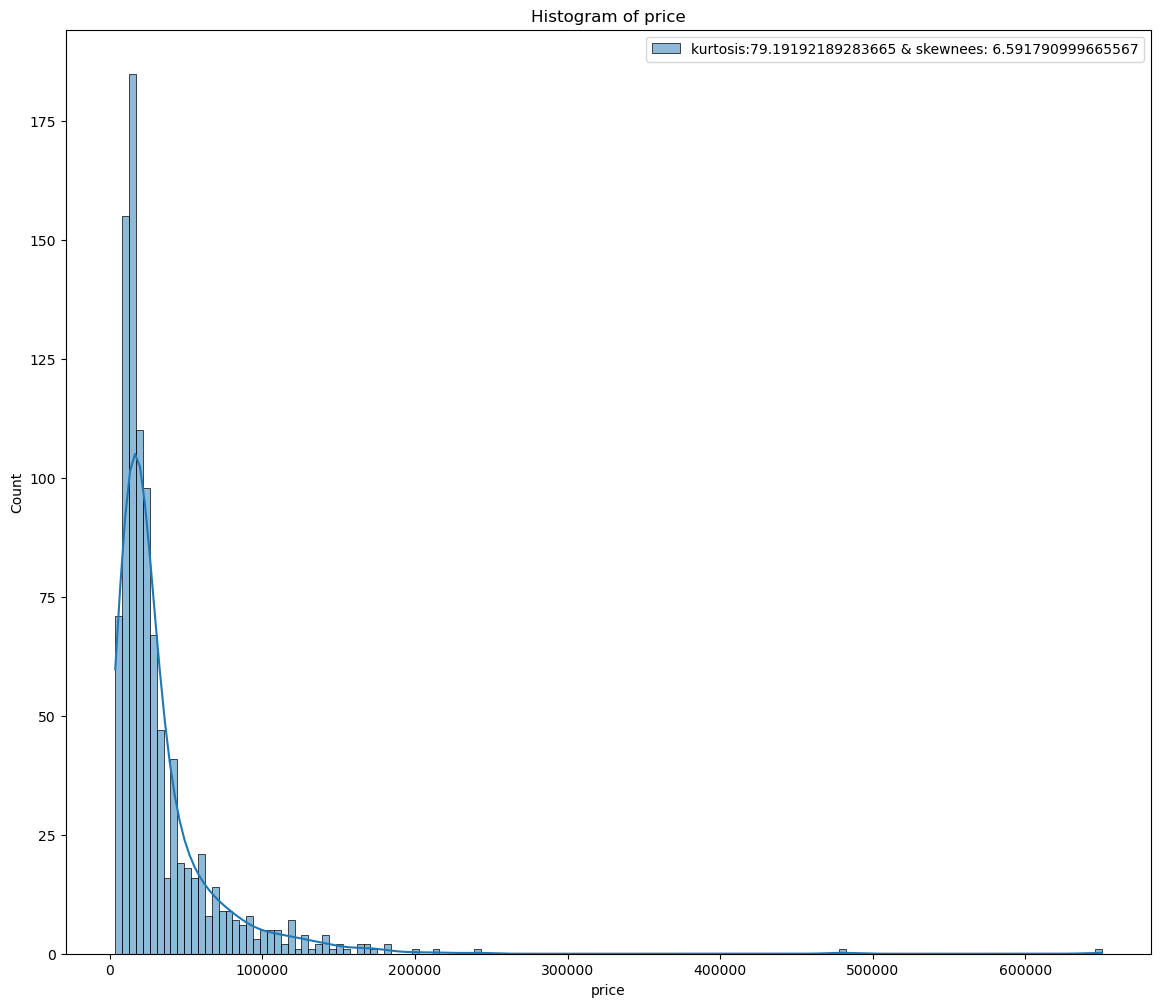

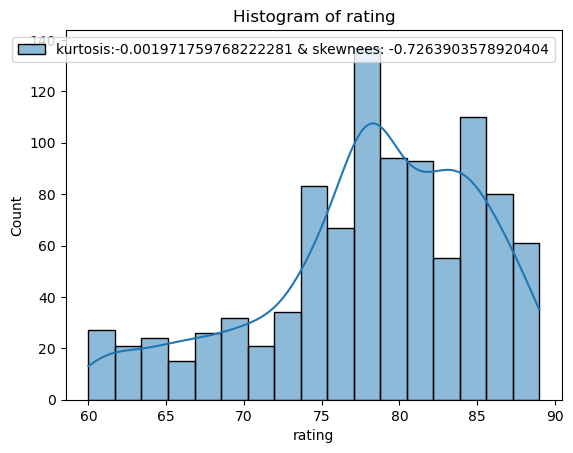

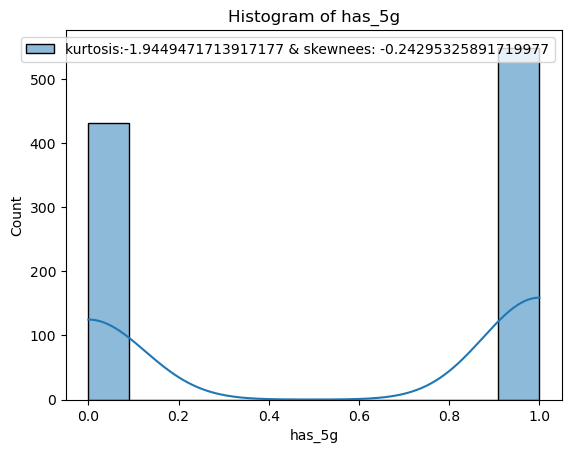

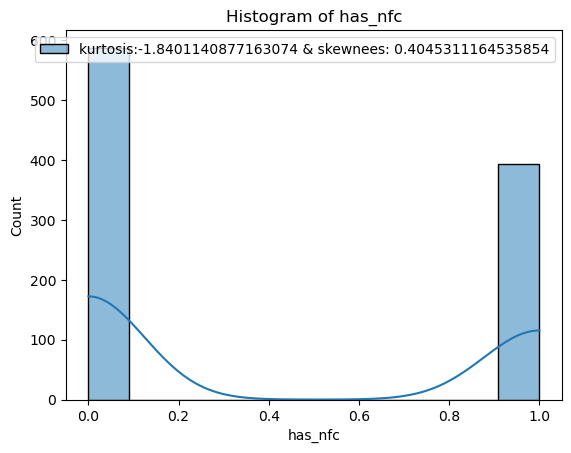

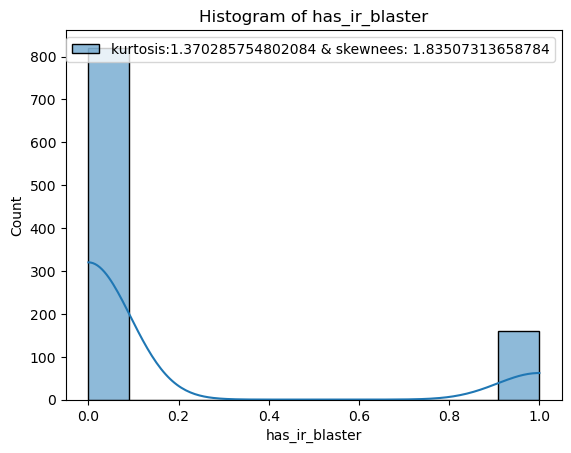

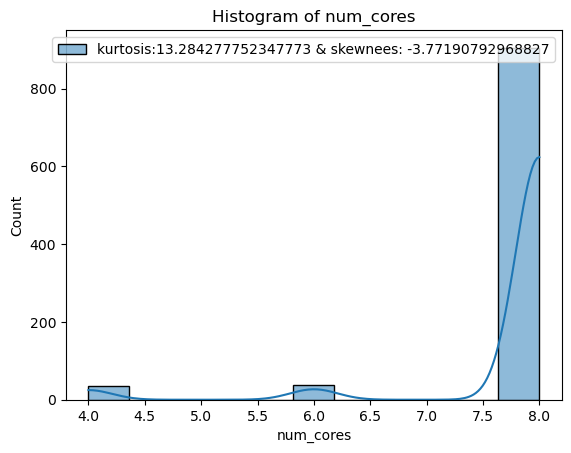

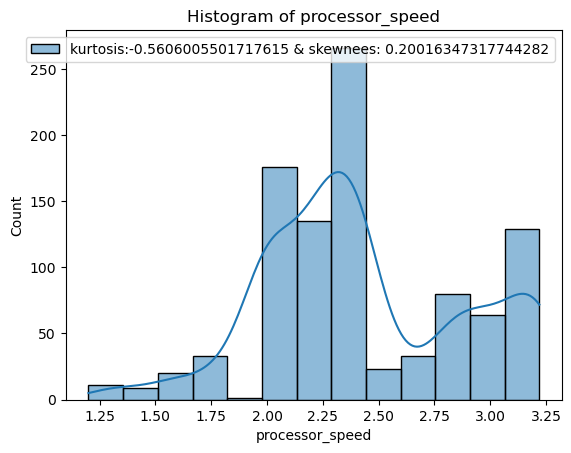

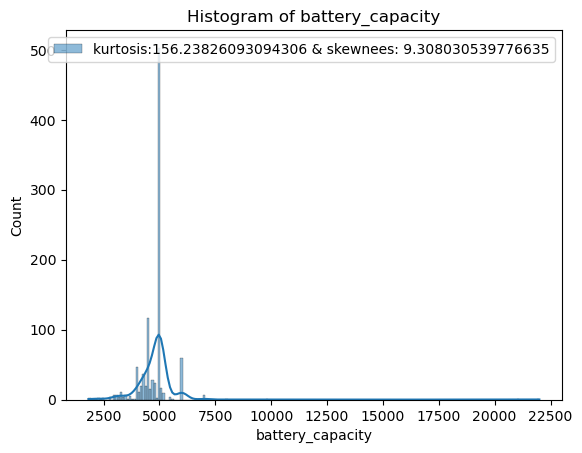

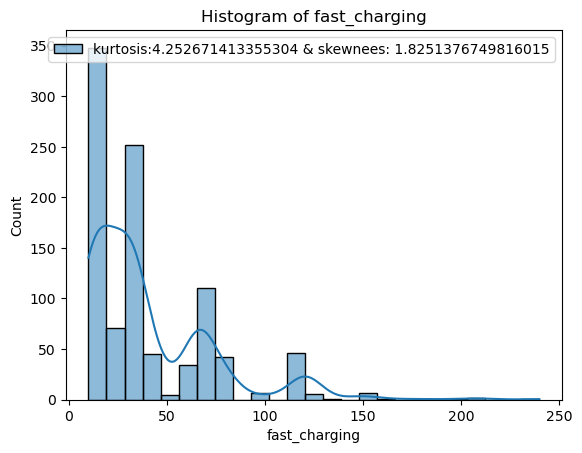

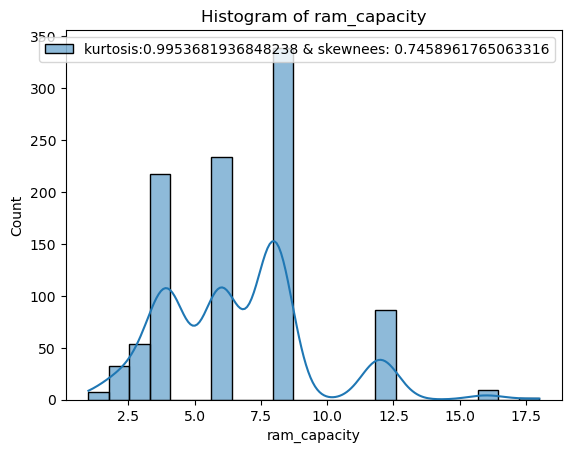

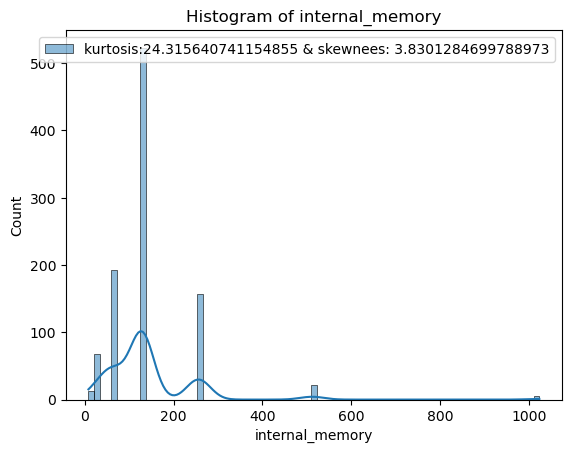

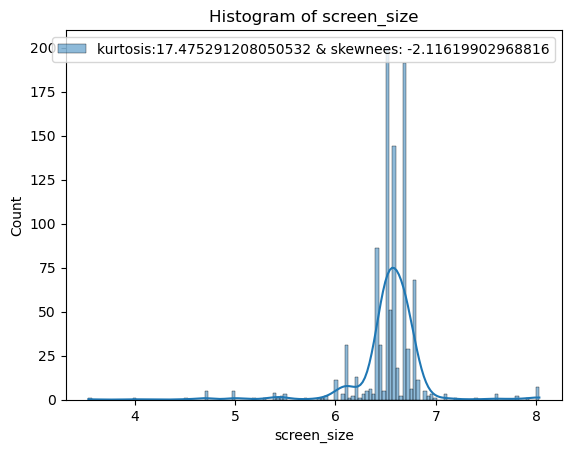

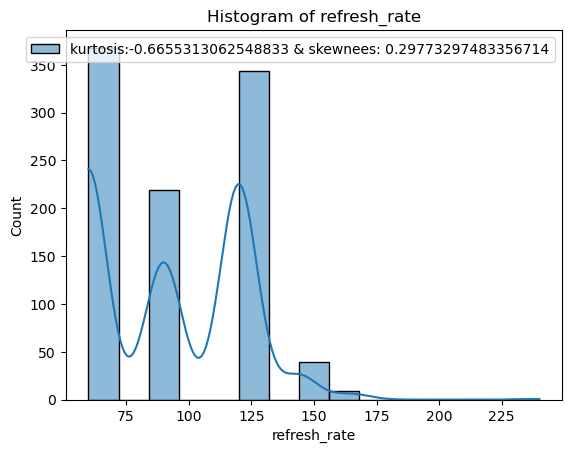

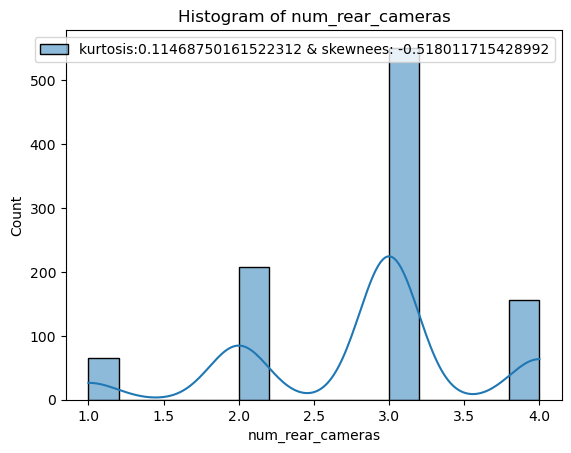

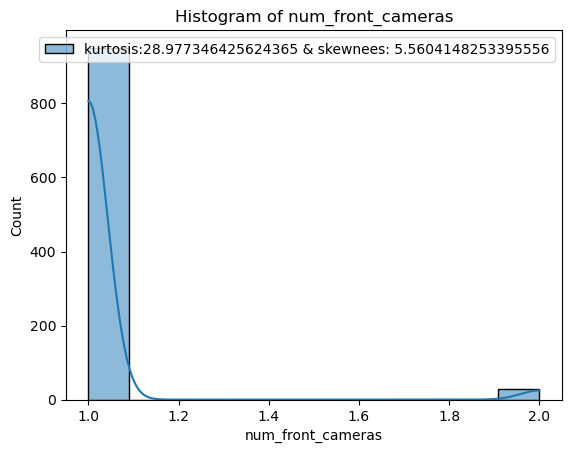

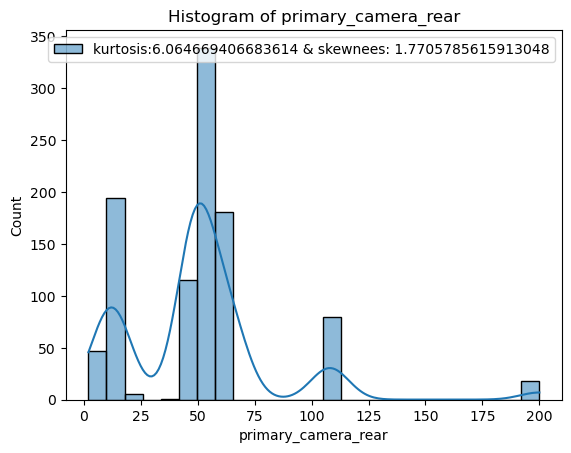

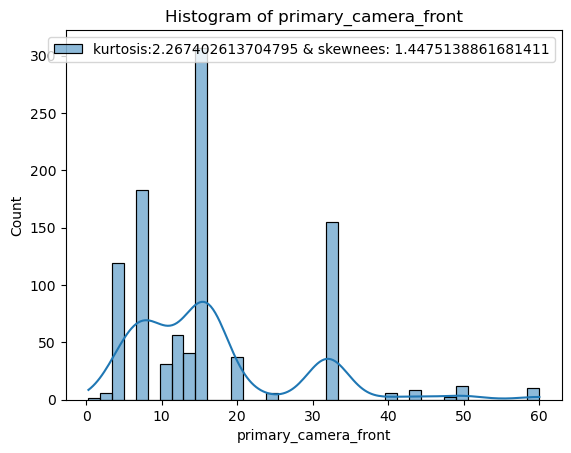

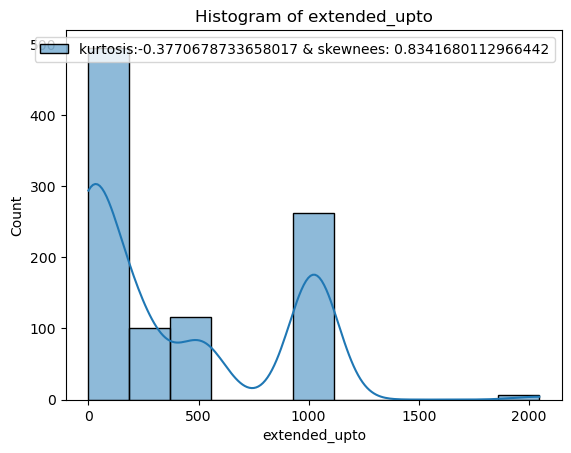

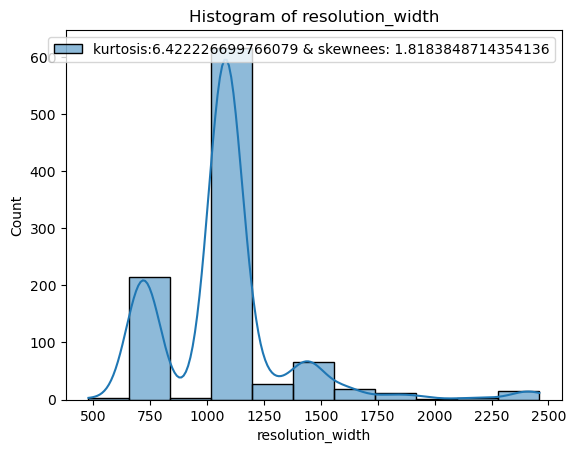

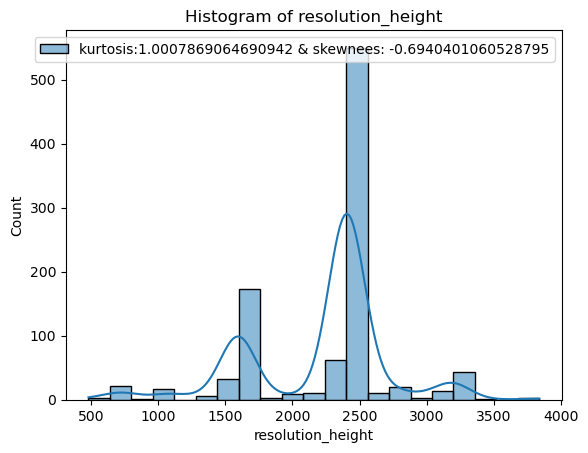

In [47]:
plt.figure(figsize=(14,12))
for i in num_col:
    k= df[i].kurt()
    s= df[i].skew()
    sns.histplot(df[i],kde=True,label=f'kurtosis:{k} & skewnees: {s}')
    plt.title(f'Histogram of {i}')
    plt.legend()
    plt.show()



This code creates a histogram for each numerical column in a dataframe `df`, displaying the distribution of values and including kurtosis and skewness statistics in the title. The code iterates over each column, calculating kurtosis and skewness using pandas methods, then uses Seaborn's `histplot` to create a histogram with a kernel density estimate (KDE) and a custom label. The title is set to include the column name and statistics.

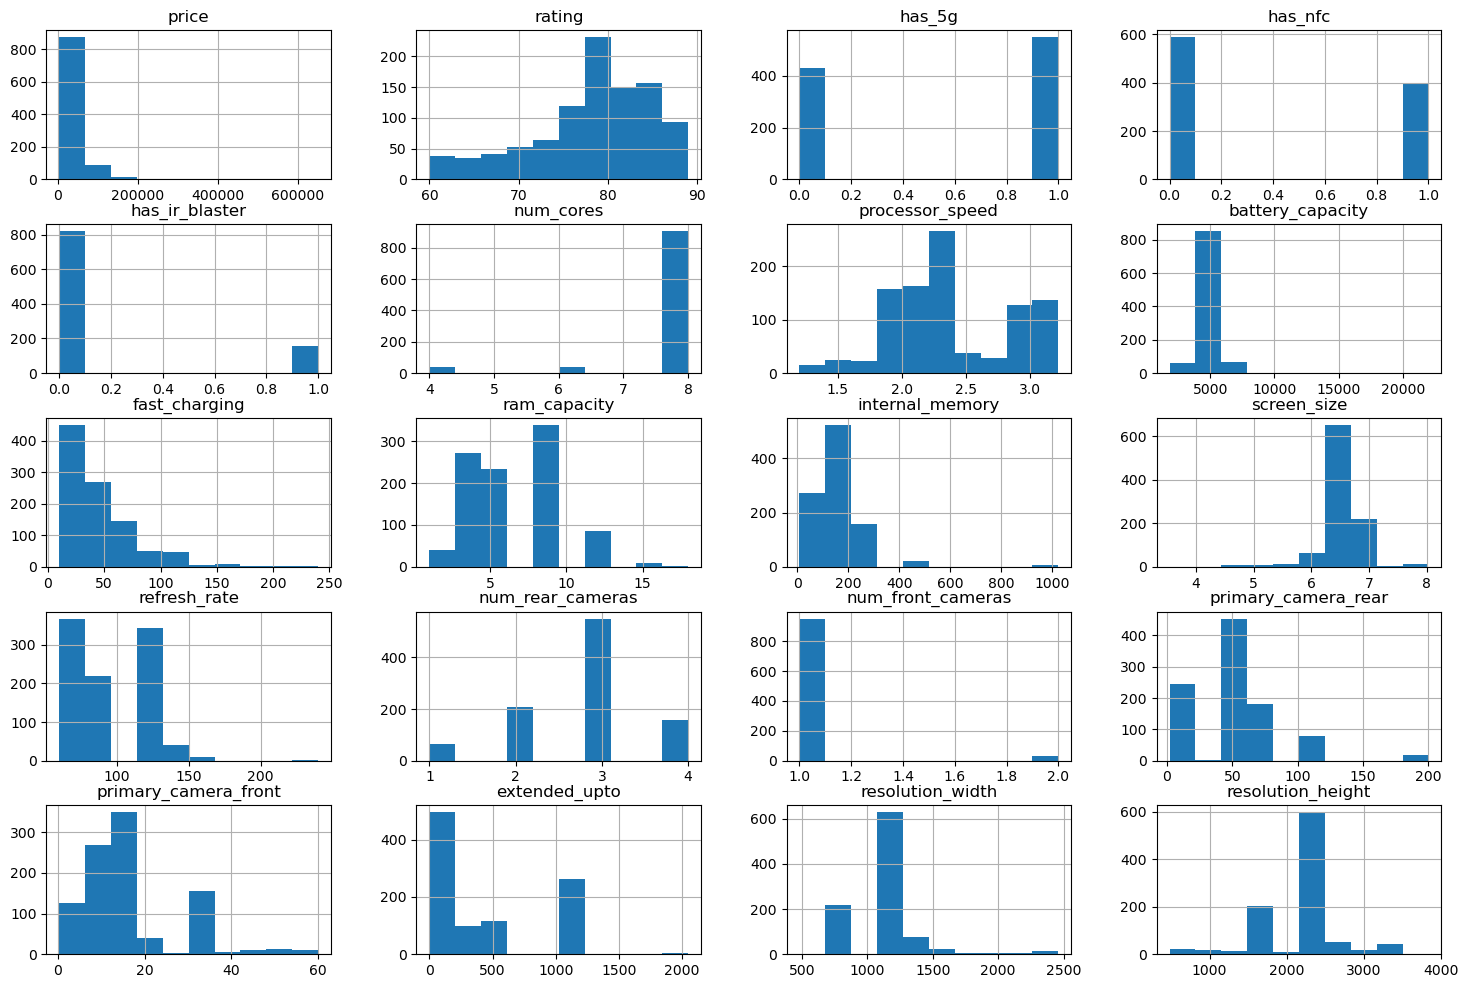

In [49]:

df[num_col].hist(figsize=(18,12));

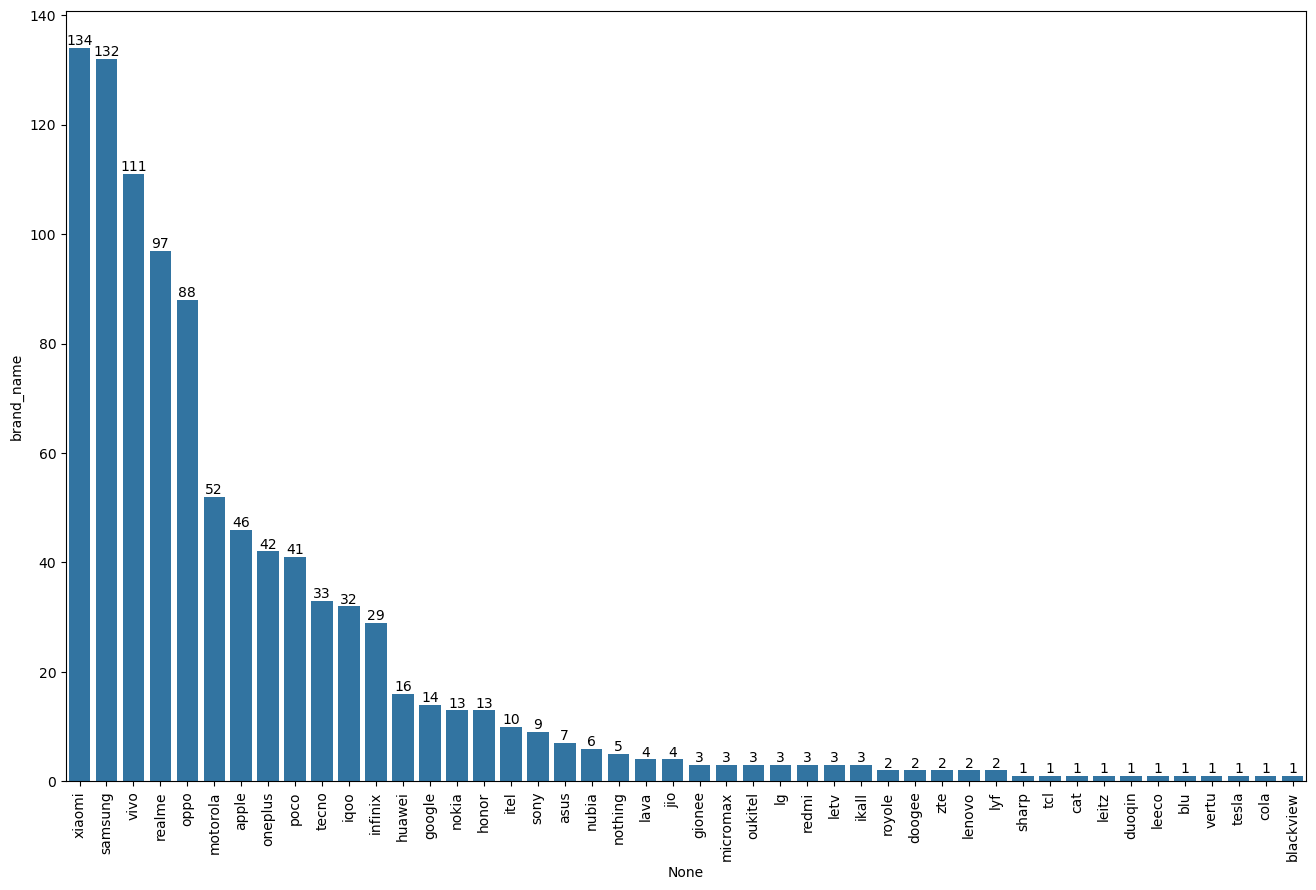

In [50]:
plt.figure(figsize=(16,10))
plot = sns.barplot(x=df.brand_name.value_counts().index,
                   y=df.brand_name.value_counts())
plot.set_xticklabels(labels=df.brand_name.value_counts().index, rotation=90)


for i in plot.containers:
        plot.bar_label(i)


The code creates a bar plot showing the top brands in a dataframe `df` and their frequencies.The x-axis represents the brand names and the y-axis represents the frequency count of each brand. The plot labels are set to be vertical to avoid overlap. The code then iterates over the bars and adds a label to each bar showing its frequency count.

<Axes: xlabel='None', ylabel='ram_capacity'>

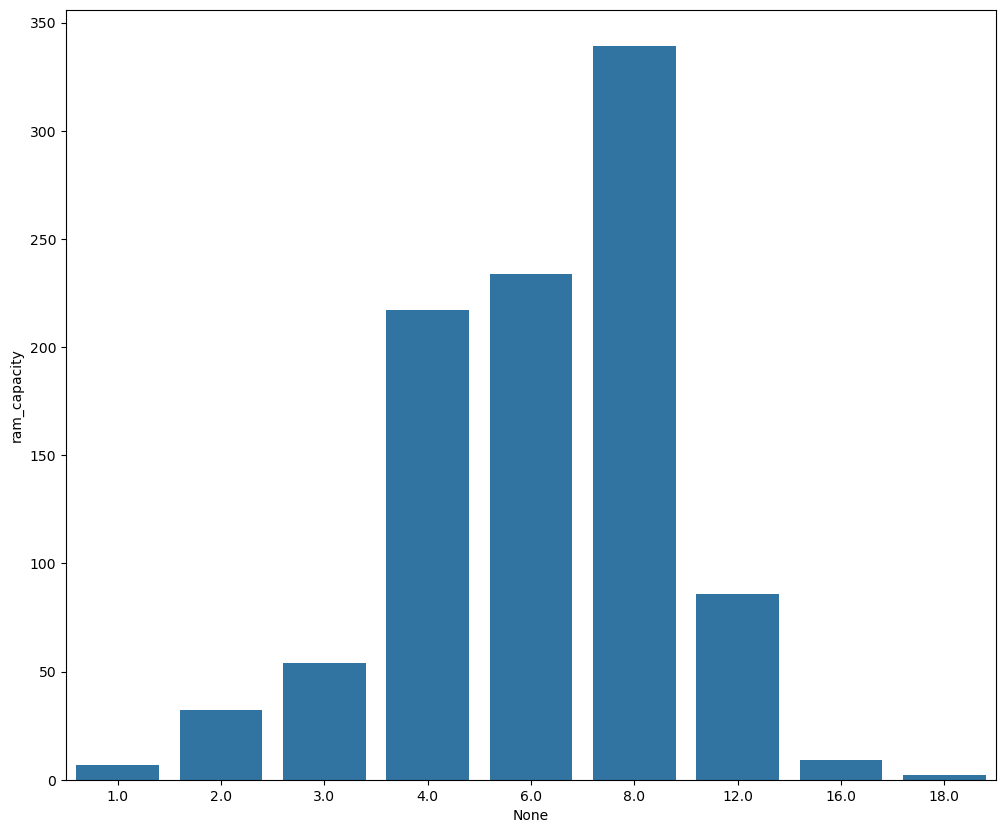

In [52]:
plt.figure(figsize=(12,10))
sns.barplot(x=df.ram_capacity.value_counts().index,y=df.ram_capacity.value_counts())


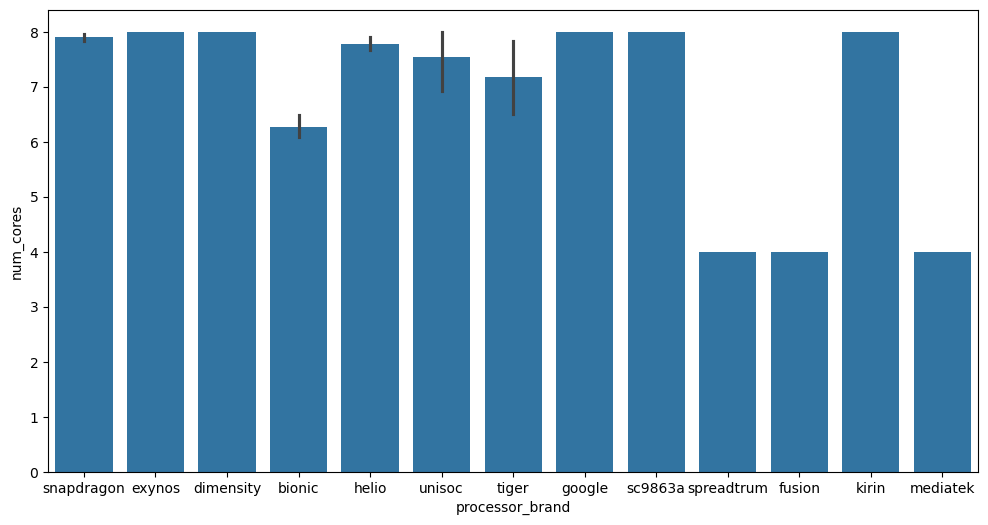

In [53]:
plt.figure(figsize=(12,6))
sns.barplot(x=df.processor_brand,y=df.num_cores)
plt.show()

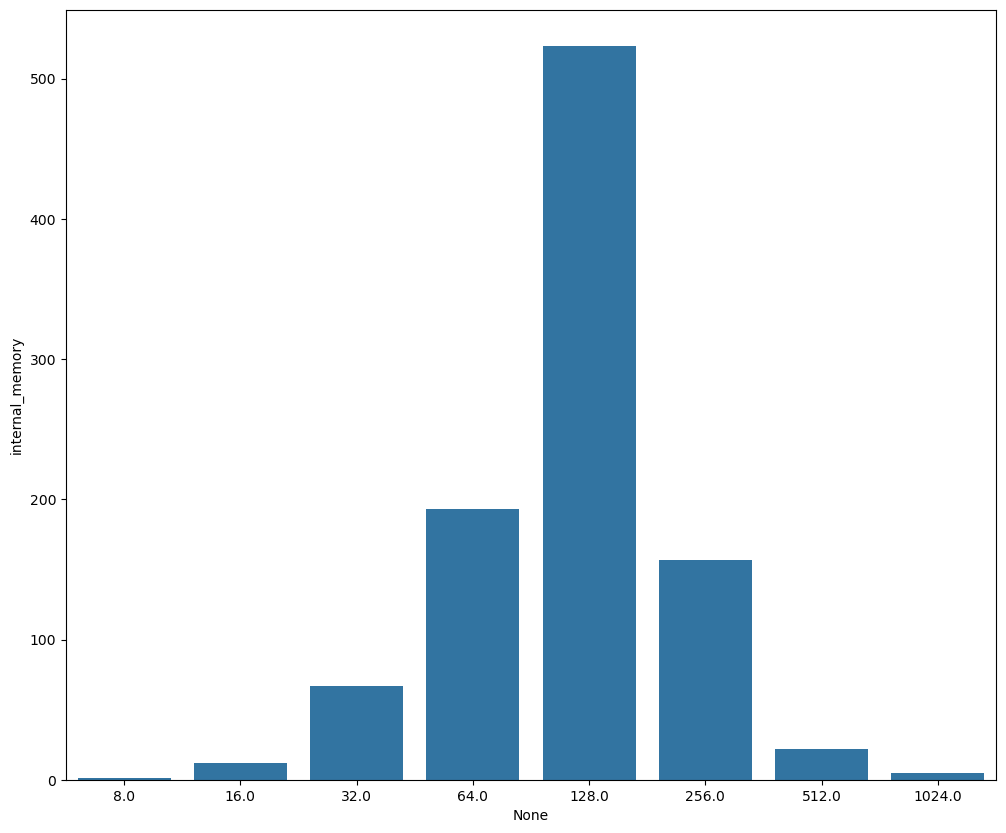

In [54]:
plt.figure(figsize=(12,10))
sns.barplot(x=df.internal_memory.value_counts().index,y=df.internal_memory.value_counts())
plt.show()

<Axes: xlabel='None', ylabel='extended_upto'>

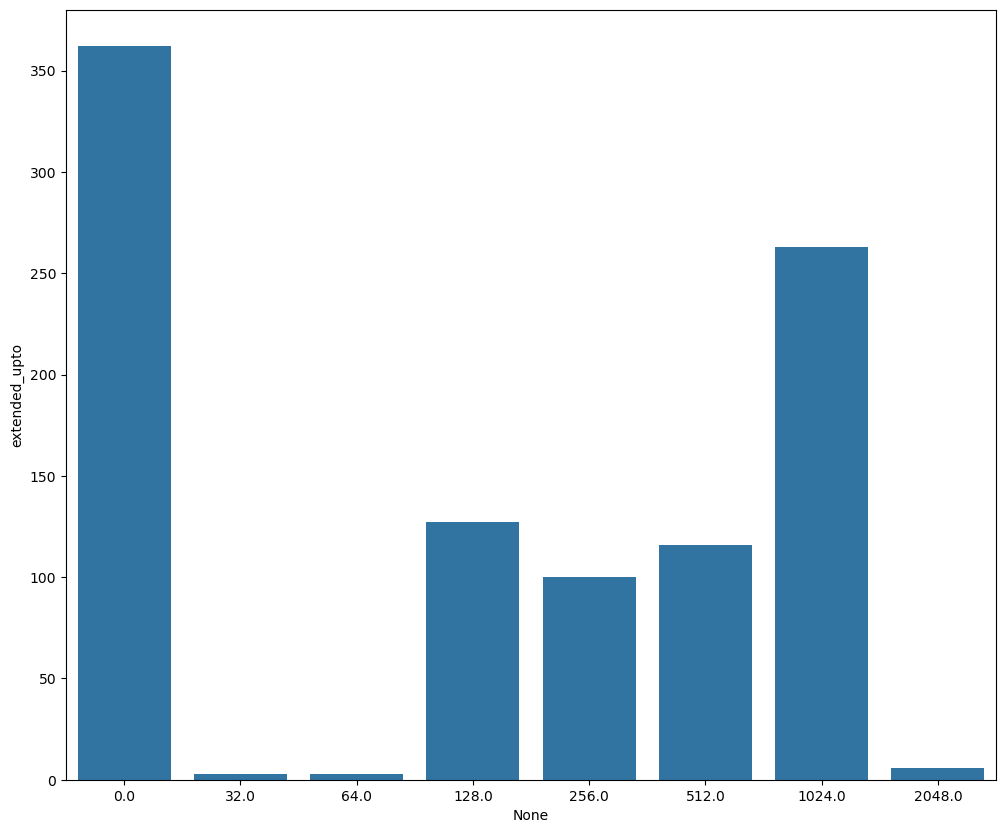

In [55]:
plt.figure(figsize=(12,10))
sns.barplot(x=df.extended_upto.value_counts().index,y=df.extended_upto.value_counts())

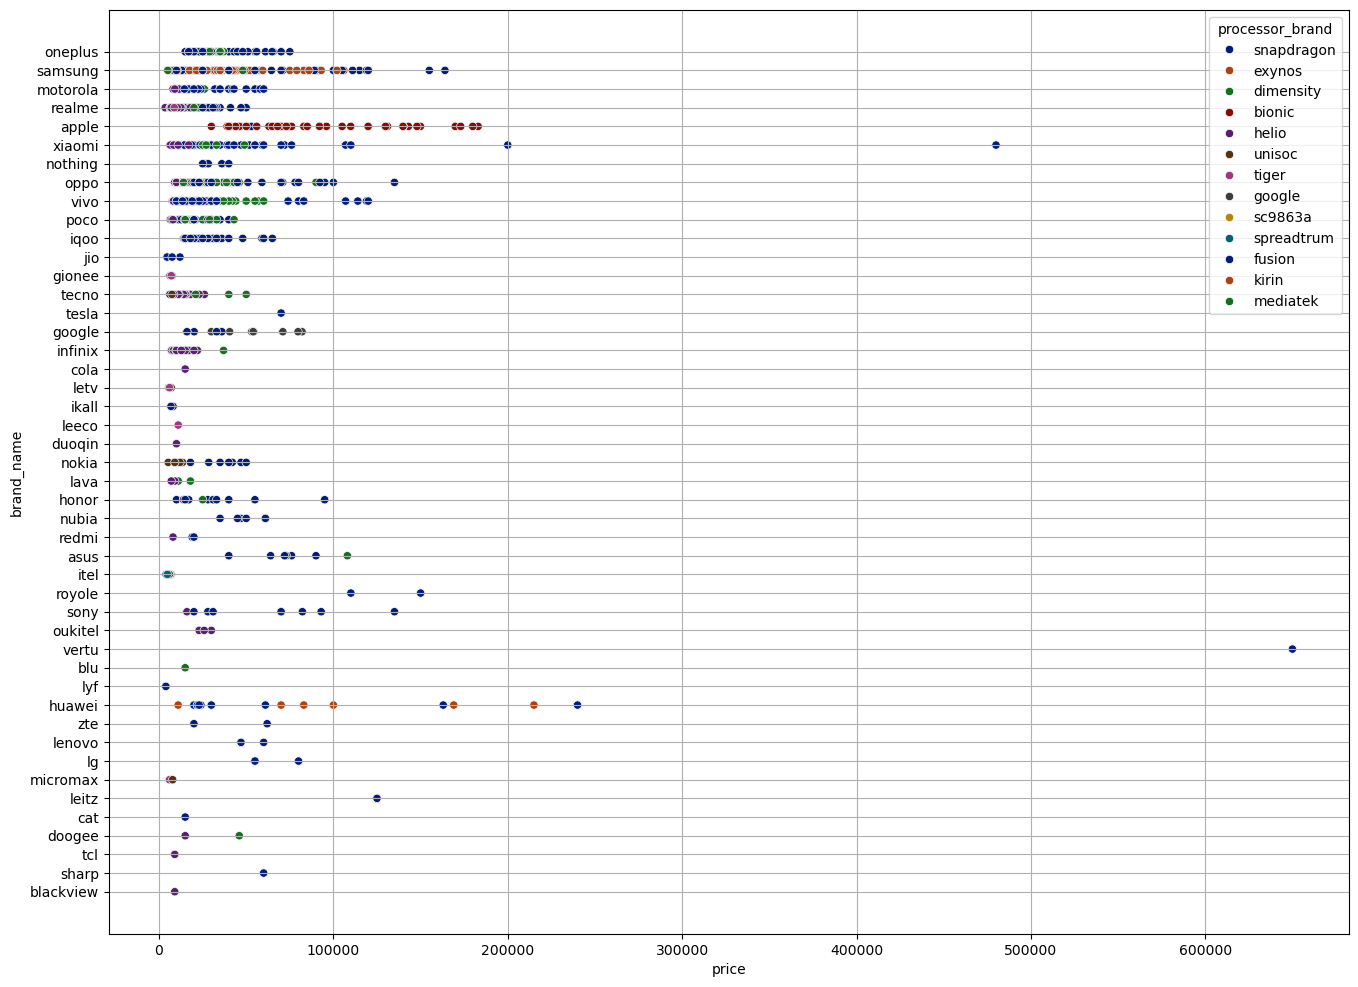

In [56]:
plt.figure(figsize=(16,12))
sns.scatterplot(x=df["price"],y=df["brand_name"],hue="processor_brand",data=df,palette="dark")
plt.grid(True)

**The page snippet describes the code used to create a scatter plot with the following features**

* The x-axis is labeled as "price"
* The y-axis is labeled as "brand_name"
* The color of the points is determined by the "processor_brand" column in the dataframe
* The color palette is set to a dark palette
* A grid is added to the plot

<Axes: xlabel='None', ylabel='fast_charging'>

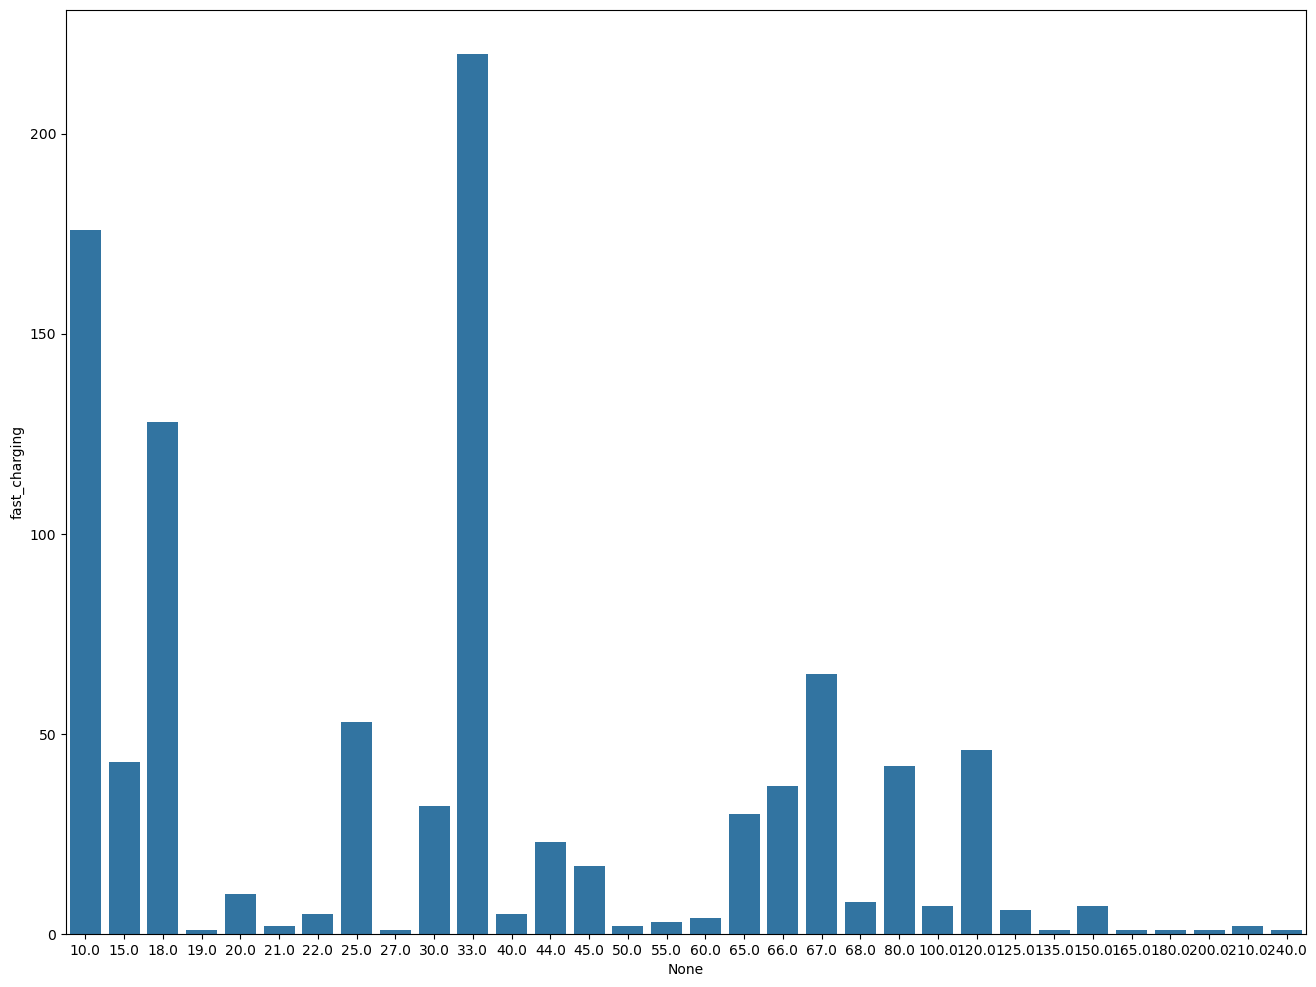

In [58]:
plt.figure(figsize=(16,12))
sns.barplot(x=df.fast_charging.value_counts().index,y=df.fast_charging.value_counts())



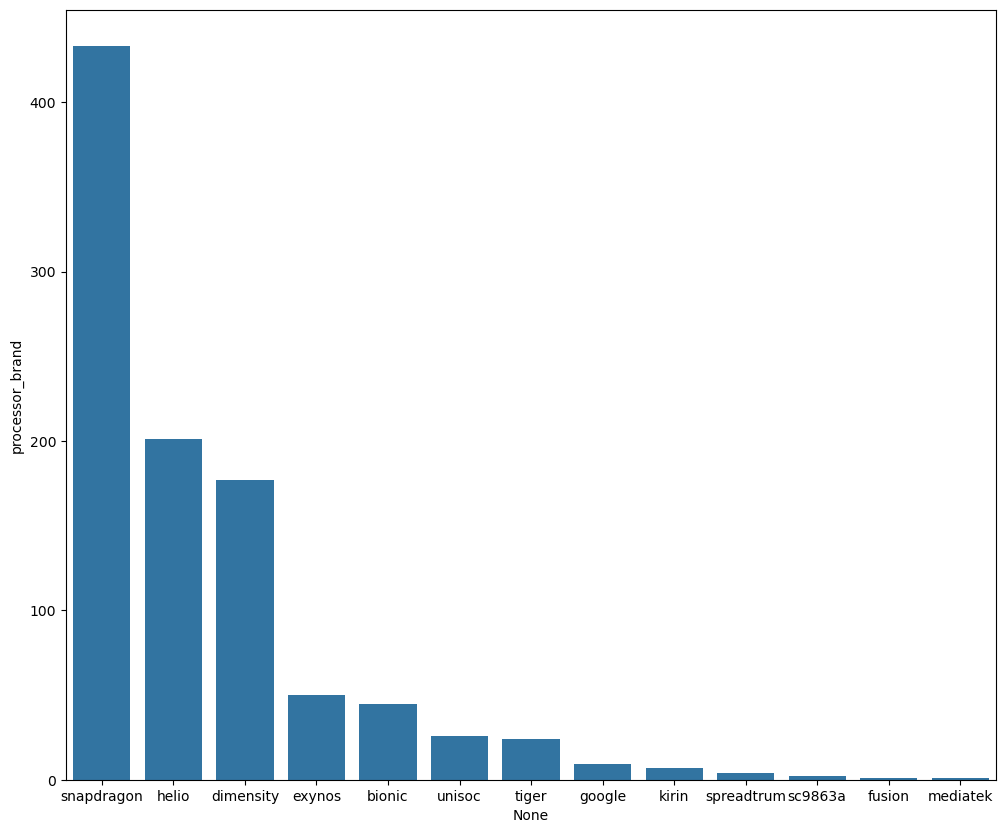

In [59]:
plt.figure(figsize=(12,10))
sns.barplot(x=df.processor_brand.value_counts().index,y=df.processor_brand.value_counts());

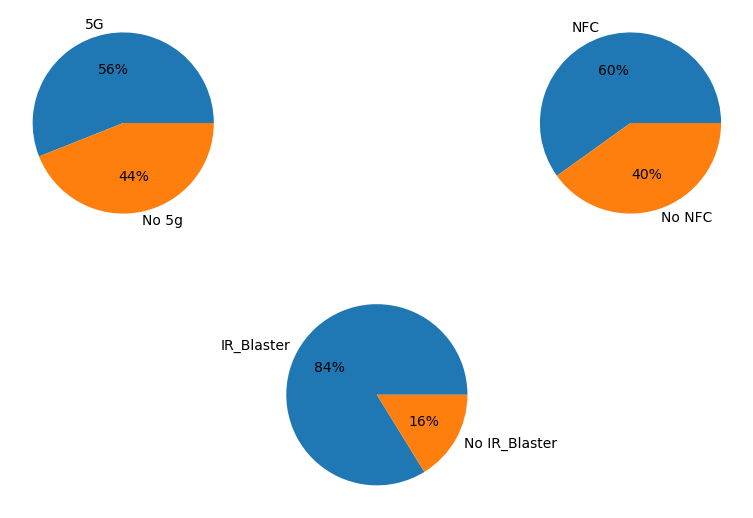

In [60]:
plt.figure(figsize=(12,10))
plt.subplot(3,2,1)
plt.pie(x=df.has_5g.value_counts(),labels=['5G','No 5g'],autopct='%.0f%%')

plt.subplot(3,2,2)
plt.pie(x=df.has_nfc.value_counts(),labels=['NFC','No NFC'],autopct='%.0f%%')

plt.subplot(3,1,2)
plt.pie(x=df.has_ir_blaster.value_counts(),labels=['IR_Blaster','No IR_Blaster'],autopct='%.0f%%');

Text(0.5, 1.0, 'Percentage of 5G Smartphones by Brands')

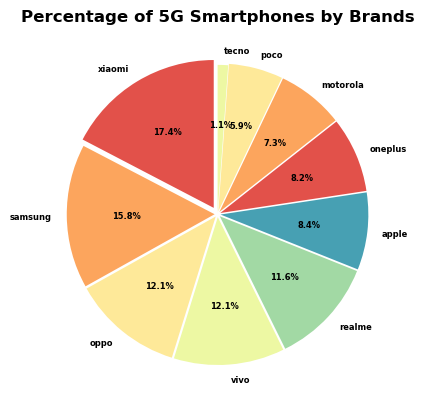

In [61]:
#The code is creating a pie chart that shows the percentage distribution of 5G smartphones by brand.
selected_brands = df[df['brand_name'].isin(['oneplus', 'motorola', 'oppo','xiaomi', 'samsung', 'vivo', 'realme', 'apple', 'poco', 'tecno'])]
smartphones_5G = selected_brands[selected_brands['has_5g'] == 1]
brand_counts = smartphones_5G['brand_name'].value_counts()
sizes = brand_counts.values
labels = brand_counts.index
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, explode = [0.05,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.01],textprops={'fontsize': 6, 'fontweight': 'bold'}, colors = sns.color_palette('Spectral'))
plt.title('Percentage of 5G Smartphones by Brands', fontweight = 'bold')


In [62]:
smartphones_IR = selected_brands[selected_brands['has_ir_blaster'] == 1]
smartphones_IR['brand_name'].value_counts()

xiaomi     109
poco        30
vivo         4
samsung      1
Name: brand_name, dtype: int64

Text(0.5, 1.0, 'Percentage of IR Blaster Smartphones by Brands')

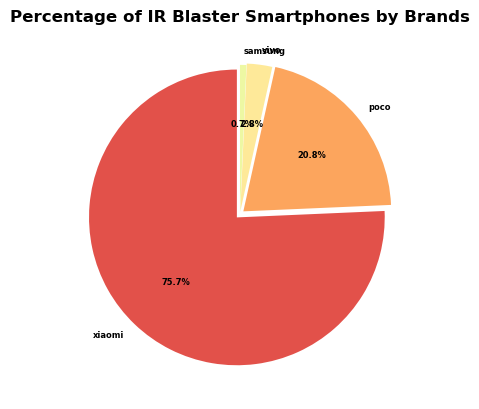

In [63]:
#The code is creating a pie chart that shows the percentage distribution of IR Blaster smartphones by brand.
selected_brands = df[df['brand_name'].isin(['xiaomi', 'vivo','samsung', 'poco'])]
brand_counts = smartphones_IR['brand_name'].value_counts()
sizes = brand_counts.values
labels = brand_counts.index
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, explode = [0.03,0.03,0.02,0.01],textprops={'fontsize': 6, 'fontweight': 'bold'}, colors = sns.color_palette('Spectral'))
plt.title('Percentage of IR Blaster Smartphones by Brands', fontweight = 'bold')


In [64]:
smartphones_NFC = selected_brands[selected_brands['has_nfc'] == 1]
smartphones_NFC['brand_name'].value_counts()

samsung    67
xiaomi     37
vivo       17
poco       11
Name: brand_name, dtype: int64

Text(0.5, 1.0, 'Percentage of NFC Smartphones by Brands')

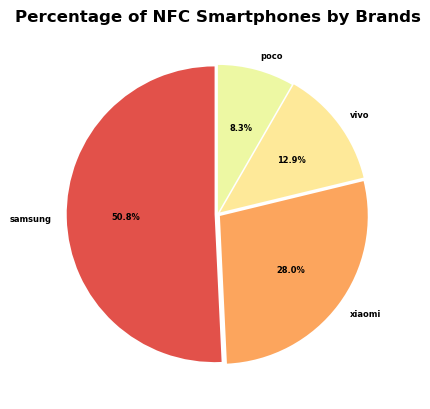

In [65]:
#The code is creating a pie chart that shows the percentage distribution of NFC smartphones by brand.
selected_brands = df[df['brand_name'].isin(['xiaomi', 'vivo','samsung', 'poco'])]
brand_counts = smartphones_NFC['brand_name'].value_counts()
sizes = brand_counts.values
labels = brand_counts.index
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, explode = [0.02,0.02,0.02,0.01],textprops={'fontsize': 6, 'fontweight': 'bold'}, colors = sns.color_palette('Spectral'))
plt.title('Percentage of NFC Smartphones by Brands', fontweight = 'bold')

(-1.130898539510837,
 1.1014673133916006,
 -1.106120519655753,
 1.1002914533169361)

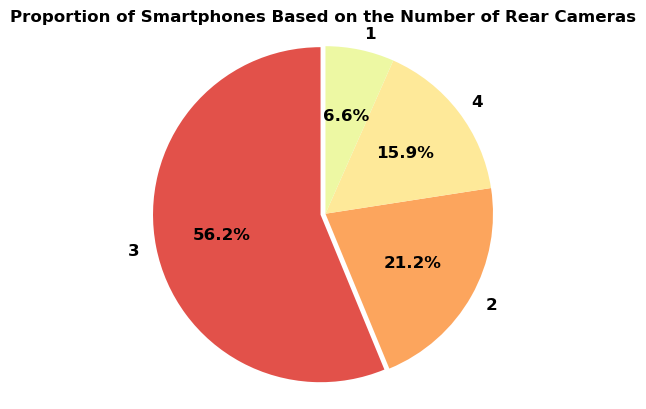

In [66]:
num_camera = df['num_rear_cameras'].value_counts()
sizes = num_camera.values
labels = num_camera.index
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle = 90, explode = [0.03,0,0,0],textprops={'fontsize': 12, 'fontweight': 'bold'}, colors = sns.color_palette('Spectral'))
plt.title('Proportion of Smartphones Based on the Number of Rear Cameras', fontweight = 'bold')
plt.axis('equal')

In [67]:
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold,StratifiedKFold,LeaveOneOut,ShuffleSplit
from sklearn.svm import SVR

In [68]:
x= df.drop(columns=['price'])
x= pd.get_dummies(x)
y=np.log1p(df['price'])


In [69]:
print(f"x shape: {x.shape}")
print(f"y shape: {y.shape}")

x shape: (980, 1061)
y shape: (980,)


In [70]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.02,random_state=42)

In [71]:
# Print the shapes of the training and testing sets
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (960, 1061)
x_test shape: (20, 1061)
y_train shape: (960,)
y_test shape: (20,)


In [72]:
def get_rmse_cross(models):
    n_folds=5
    kfold = KFold(n_folds, random_state=42, shuffle=True).get_n_splits(x_train)
    rmse_score = np.sqrt(-cross_val_score(models, x_train, y_train, scoring = "neg_mean_squared_error", cv = kfold, verbose = 0, n_jobs=-1))
    return(np.mean(rmse_score))

# RMSE without cross validation
def get_rmse(X,y): 
    rmse_score = np.sqrt(mean_absolute_error(x,y))
    return rmse_score


• The `get_rmse_cross` function calculates the Root Mean Squared Error (RMSE) using cross-validation with 5 folds, evaluating the performance of a machine learning model on a dataset.

• The `get_rmse` function calculates the RMSE without cross-validation, directly evaluating the performance of a model on a dataset using the mean absolute error (MAE).

**DecisionTreeRegressor**

In [75]:
DTR_models = DecisionTreeRegressor(
    random_state=32,
    max_features=0.4,
    max_depth=20
)
DTR_models.fit(x_train, y_train)
y_pred = DTR_models.predict(x_test)
rmse_DTR = get_rmse_cross(DTR_models)
print('R2 Score: ', r2_score(y_test, y_pred))
print('MEA : ', mean_absolute_error(y_test, y_pred))
print('MSE : ', mean_squared_error(y_test, y_pred))
print('RMSE without cross validation:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('RMSE with cross validation:',rmse_DTR)

R2 Score:  0.948546877968174
MEA :  0.15701670632212653
MSE :  0.03653681213439408
RMSE without cross validation: 0.19114604922517778
RMSE with cross validation: 0.35261067335305163


**Creates a DTR model with hyperparameters:**
	+ Random state: 32
	+ Max features: 40% of total features
	+ Max depth: 20
* Trains the model on training data (`x_train` and `y_train`)
* Makes predictions on test data (`x_test`)
* Calculates and prints evaluation metrics:
	+ R-squared score
	+ Mean Absolute Error (MAE)
	+ Mean Squared Error (MSE)
	+ Root Mean Squared Error (RMSE) with and without cross-validation

**RandomForestRegressor**

In [78]:
RFG = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    max_samples=1.0,
    max_features=0.4,
    max_depth=20
)
RFG.fit(x_train, y_train)
y_pred = RFG.predict(x_test)
rmse_RFG = get_rmse_cross(RFG)

print('R2 Score: ', r2_score(y_test, y_pred))
print('MEA : ', mean_absolute_error(y_test, y_pred))
print('MSE : ', mean_squared_error(y_test, y_pred))
print('RMSE without cross validation:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('RMSE with cross validation:',rmse_RFG)

R2 Score:  0.9515845721227633
MEA :  0.13033826169455942
MSE :  0.034379748456522
RMSE without cross validation: 0.18541776737012558
RMSE with cross validation: 0.27305002441093973


**GradientBoostingRegressor**

In [80]:
GBR_models = GradientBoostingRegressor(n_estimators=100,
                                      learning_rate=0.1,
                                      max_depth=3,
                                      random_state=42)
GBR_models.fit(x_train, y_train)
y_pred = GBR_models.predict(x_test)
rmse_GBR = get_rmse_cross(GBR_models)

print('R2 Score: ', r2_score(y_test, y_pred))
print('MEA : ', mean_absolute_error(y_test, y_pred))
print('MSE : ', mean_squared_error(y_test, y_pred))
print('RMSE without cross validation:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('RMSE with cross validation:',rmse_GBR)

R2 Score:  0.9306420506937564
MEA :  0.16886050518944096
MSE :  0.04925101264528886
RMSE without cross validation: 0.22192569171974852
RMSE with cross validation: 0.2795754187365601


In [81]:
#Create a Data Frame
models = ['DecisionTreeRegressor', 'RandomForestRegressor', 'GradientBoostingRegressor']
rmse = [rmse_DTR, rmse_RFG, rmse_GBR]
models_error =  pd.DataFrame({'Model':models,'RMSE':rmse})
models_error = models_error.sort_values(by='RMSE',ascending=False)
models_error

,Model,RMSE
0,DecisionTreeRegressor,0.352611
2,GradientBoostingRegressor,0.279575
1,RandomForestRegressor,0.273050


Creates a Pandas DataFrame to compare the Root Mean Squared Error (RMSE) of three different machine learning models: Decision Tree Regressor (DTR), Random Forest Regressor (RFG), and Gradient Boosting Regressor (GBR).

1. `models = ['DecisionTreeRegressor', 'RandomForestRegressor', 'GradientBoostingRegressor']`: Creates a list of model names.
2. `rmse = [rmse_DTR, rmse_RFG, rmse_GBR]`: Creates a list of RMSE values for each model, where `rmse_DTR`, `rmse_RFG`, and `rmse_GBR` are presumably the RMSE values calculated earlier.
3. `models_error = pd.DataFrame({'Model':models,'RMSE':rmse})`: Creates a Pandas DataFrame with two columns: `Model` and `RMSE`. The `Model` column contains the model names, and the `RMSE` column contains the corresponding RMSE values.
4. `models_error = models_error.sort_values(by='RMSE',ascending=False)`: Sorts the DataFrame in descending order based on the `RMSE` column, so that the model with the lowest RMSE is at the top.

The resulting DataFrame will show the RMSE values for each model, allowing you to compare their performance. The model with the lowest RMSE is likely to be the best performer.

<Axes: xlabel='Model', ylabel='RMSE'>

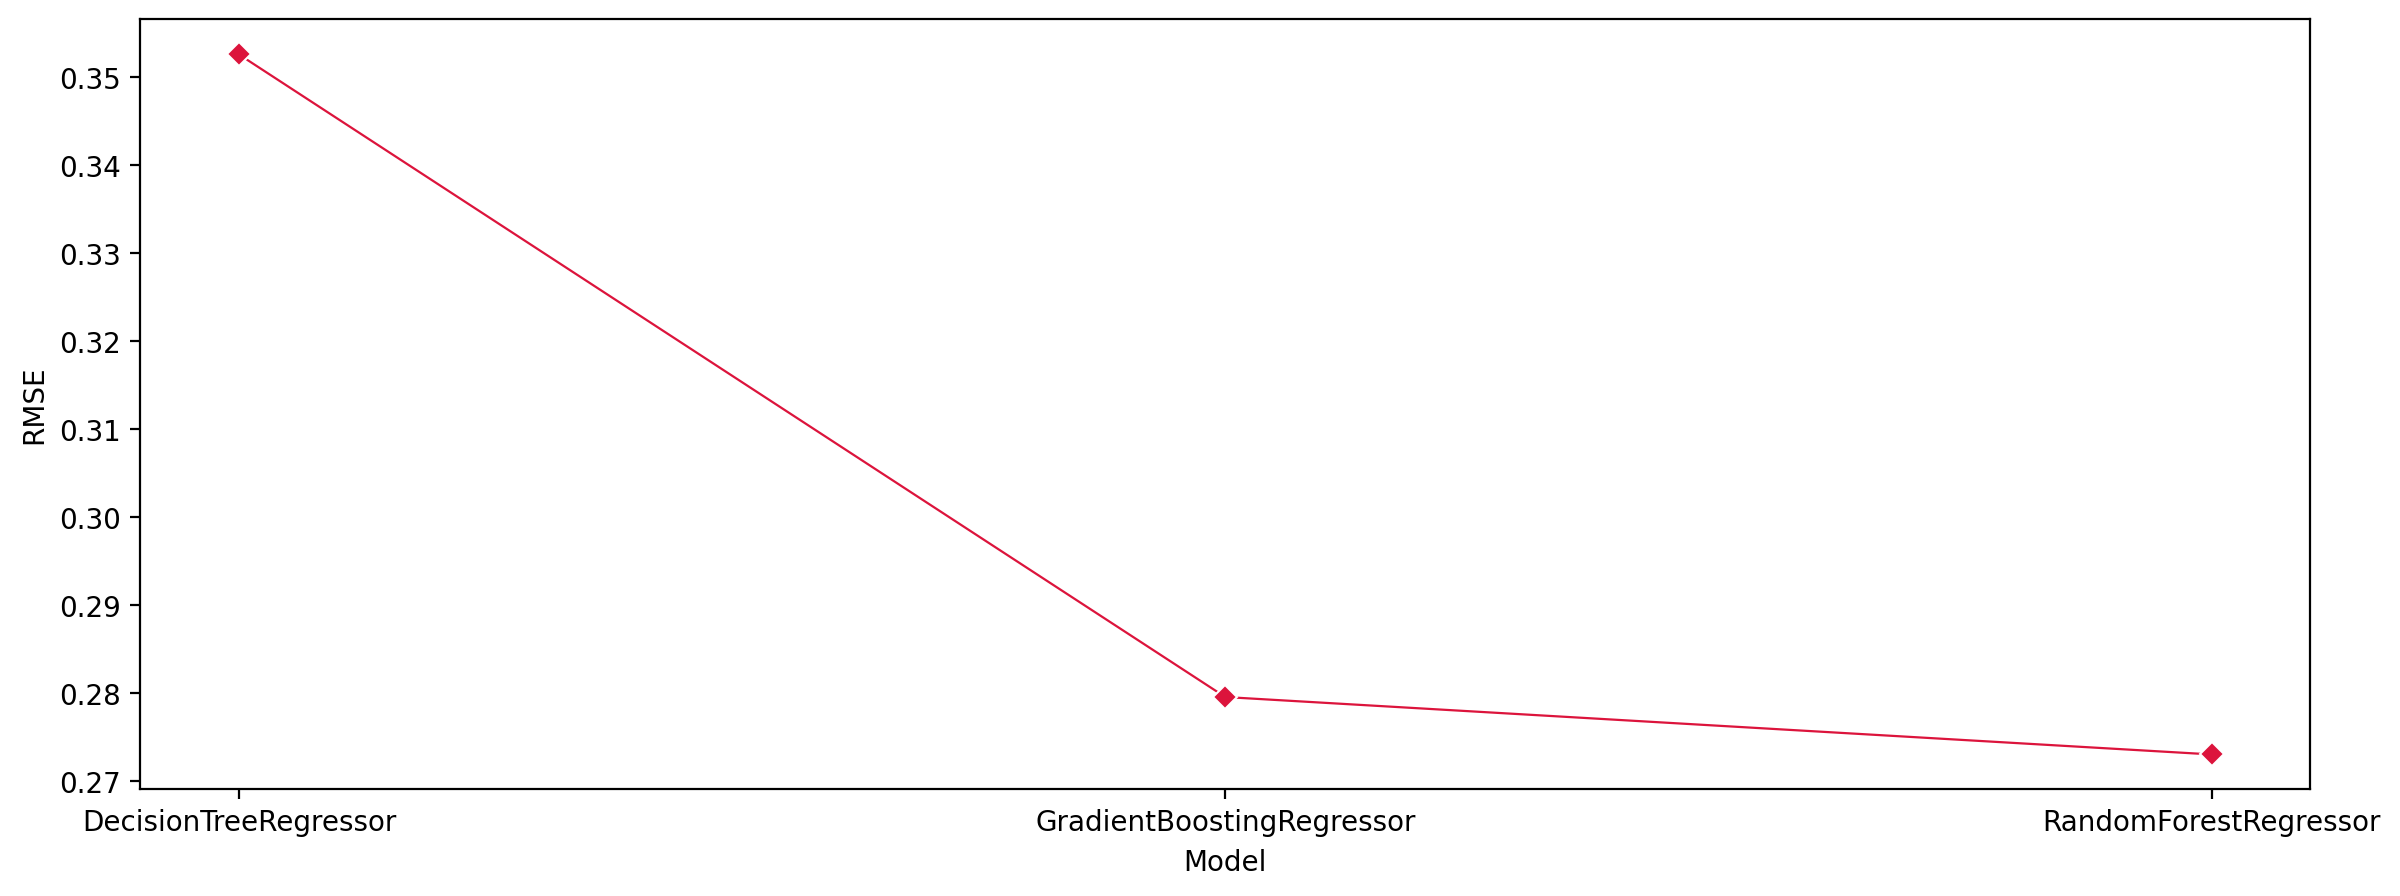

In [83]:
plt.figure(figsize=(14,5),dpi=200)
sns.lineplot(models_error,x='Model',y='RMSE',marker='D',linewidth=0.8,color='crimson')

**The plot shows the relationship between model names and their RMSE values with diamond markers and a crimson line connecting them**